<h1>Finding the perfect HDB Block in Singapore</h1>

<h2>1. Introduction</h2>

<p>Singapore is a very small but well-developed country in Southeast Asia. It has only one city, named Singapore, which has gained a reputation for holding first Trump-Kim Summit. Long before that, Singapore is always being a very international city where most regional headquarters for top 500 fortune companies are located. According to the report of Department of Statistics Singapore, the proportion of Singapore citizens in the total population is only 61.56% in 2018, and for Permanent Residents and foreigners, it is 9.26% and 29.16% respectively. For people moving to Singapore, settling down and finding the perfect place to live would be the first thing to be considered.</p>

<p>However, the current property recommendation system in Singapore is not as perfect as it should be.  Generally speaking, if someone decides to live in a new place, before contacting a specific property agent, he or she should clearly know that which location is a preference, as different districts usually have different agents. This question is actually very difficult to be answered for residents in Singapore, especially those newcomer foreigners.  Singapore has no rural areas, and the mature communities always have convenient transportation and life facilities. If your work location is in the CBD like Raffles Place, even if you live in the westmost or east most areas of Singapore, it may only take an hour from your home to work place. If you can bear the distance for 30 minutes’ public transportation, you still have too many choices about where to live.  As a result, region factor cannot be in the first place to classify costumers in local property market. </p>

<p>In this report, I try to build a new property recommendation system for local agents. I believe customers’ different needs on life-styles is beyond location preference in most cases in Singapore. For example, parents with young kids would take the distance to elite primary schools on as their priority, while foreign students and young employees maybe enjoy a rapid and modern life-style, and they might choose somewhere close to MRT, coffee shops and gyms.  So, I suggest we should firstly cluster properties types in the whole city (which is equal to the whole country) by differences of customers’ needs, then add that customers’ detailed preferences to decide which regions and what blocks are the best choice for them. Over eighty percent of Singapore residents choose to live in HDB (Housing and Development Board) blocks, and the data about those HDB blocks is very easy to get from government supported websites. As a result, I narrowed down my research scope, and focus on HDB only. </p>

<h2>2. Data</h2>

<p>The data includes three aspects.</p>

<h4>2.1 HDB related data</h4>

**Basic building features**

<p>I got a data set about all the HDB blocks(12132 blocks in total) in Singpaore, from website "https://data.gov.sg/", which includes the block numbers, street names, flat areas, the built year and so on. I assumed that those blocks  standing in the same street and built in the same year have similar features,  and emerged them into a group. Eventually, I got 1570 block groups. As is shown(the first column shows the representive block of each group, the last column shows other similar blocks numbers that have the same street names): </p>

In [1]:
import pandas as pd
filename = "simi_blocks.csv"
df = pd.read_csv(filename)
df.head()

,blk_no,street,max_floor_lvl,year_completed,residential,commercial,market_hawker,miscellaneous,multistorey_carpark,precinct_pavilion,...,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,similar blocks
0,469B,ADMIRALTY DR,16,1999,Y,N,N,N,N,N,...,72,48,54,0,0,0,0,0,0,"356A,356B,356C,357,357A,357B,357C,359,359A,359..."
1,467A,ADMIRALTY DR,16,2000,Y,Y,N,N,N,N,...,72,48,54,0,0,0,0,0,0,"353A,353B,353C,354A,354B,354C,354D,467,467A"
2,405,ADMIRALTY LINK,15,1999,Y,N,N,Y,N,N,...,112,0,0,0,0,0,0,0,0,"401,402,403,404,405"
3,485,ADMIRALTY LINK,16,2001,Y,N,N,N,N,N,...,154,0,0,0,0,0,0,0,0,"484,485"
4,493,ADMIRALTY LINK,21,2002,Y,N,N,N,N,N,...,82,59,0,0,0,0,0,0,0,"486,491,492,493"


**price feature**

<p>Price is a very important factor for making decisions about renting or buying houses. However, the data set I got from the above webside didn't include the price feature. So, I decide to collect that kind of data from local property webside. and I chose the webside "https://www.srx.com.sg/", which is from SRX company. by inputing the street name and block number of a certain block, we can get a web page that shows a list of selling price details. I use the mean price from that list of blocks as our index</p> 

**location data**

<p>Getting location data is a necessary in our report for two reasons. Firstly, by using location data of each block, we can get venue features from foursquare, the life styles reflected by venue features are very important for our analysis. Secondly, we can compute the distance between each block and other life facilities such as primary school.</p>
<p>By using the package Geocoder in Python, I got the latitudes and longitudes of the 1570 representive blocks.Then I creat a map by adding the price index</p>

![alt text][logo]

[logo]:hdb_price_distribution.png "selling prices map"

**venue features**

In [79]:
filename3 = "block_venues.csv"
df3 = pd.read_csv(filename3)
df3.head()

,Unnamed: 0,block_street,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,0,"1A,CANTONMENT RD",1.27783,103.840953,Nylon Coffee Roasters,1.276657,103.840073,Coffee Shop
1,1,"1A,CANTONMENT RD",1.27783,103.840953,Binomio Spanish Restaurante,1.277713,103.842248,Spanish Restaurant
2,2,"1A,CANTONMENT RD",1.27783,103.840953,Man Man 鰻満 Japanese Unagi Restaurant (Man Man ...,1.278876,103.841514,Japanese Restaurant
3,3,"1A,CANTONMENT RD",1.27783,103.840953,D.Bespoke,1.278680,103.840897,Speakeasy
4,4,"1A,CANTONMENT RD",1.27783,103.840953,APIARY,1.279499,103.842294,Ice Cream Shop


In [22]:
print('There are {} uniques categories.'.format(len(df3['Venue Category'].unique())))

There are 308 uniques categories.


**transportation features**

In [66]:
with open('lta-mrt-station-exit-kml.kml', 'rt') as myfile:
    doc=myfile.read()

In [72]:
from bs4 import BeautifulSoup as soup

In [74]:
page_soup = soup(doc, "html.parser")

In [76]:
page_co = page_soup.findAll("coordinates")

In [88]:
m = len(page_co)

In [96]:
lat = []
lon = []
for i in range(0,m):
    coor = page_co[i].text.split(',')
    lat.append(coor[1])
    lon.append(coor[0])
    
    

In [101]:
import pandas as pd

In [109]:
df = pd.DataFrame(lat,columns = ['latitude'])

In [110]:
df['longitude']=lon

In [113]:
df.to_csv("exit_Data.csv",index = False)

<h4>2.2 Primary school related data</h4>

<p>Singapore govenment claims that the primary school enrollment policy strictly obeys within 1 km and within 2 km standard. As a result, moving to a new place to get a higher chance in school enrollment is very common in Singapore. So I add the prmary school related data in my research</p>
<p> We got the primary school list from webside, and by using geocoder package, got their locations as well.</p>

In [23]:
filename4 = "primary_school.csv"
df4 = pd.read_csv(filename4)
df4.head()

,name,latitude,longitude
0,Anderson Primary School,1.376318,103.835562
1,Ang Mo Kio Primary School,1.369100,103.839360
2,CHIJ St Nicholas Girls’ (Primary),1.340853,103.878447
3,Jing Shan Primary School,1.372258,103.852015
4,Mayflower Primary School,1.376664,103.843242


<h4>2.3 MindChamps preschools related data</h4>

<p>MindChamps is a very famous preschool brand in local education system, and it is alse my favourate type. So I planned to explore further on choosing perfect block after clustering those HDB blocks and giving them different labels.</p>
<p> This data set is not included in the cluster analysis</p>

In [24]:
filename5 = "mindchamps_info.csv"
df5 = pd.read_csv(filename5)
df5.head()

,Unnamed: 0,name,address,centre_no,postal_code,address_0,latitude,longitude
0,0,Boon Keng (Kallang),"30A Kallang Place, #01-01, Singapore 339213 (n...",6291 3068 /\n8820 3118,339213,30A Kallang Place,1.314695,103.865767
1,1,City Square Mall,"180 Kitchener Road, City Square Mall #07-01/05...",6834 4388,208539,180 Kitchener Road,1.311243,103.856577
2,2,Concorde Hotel (Orchard),"100 Orchard Road, #01-03C, Concorde Hotel & Sh...",6235 2358 /\n9665 3840,238840,100 Orchard Road,1.300618,103.842155
3,3,Liang Court,"177 River Valley Road, Liang Court #05-01, Sin...",6338 3002 /\n9114 2280,179030,177 River Valley Road,1.291575,103.845284
4,4,Paragon,"290 Orchard Road, Paragon #06-19/20, Singapore...",6732 0087,238859,290 Orchard Road,1.303661,103.835366


<h2>3 Analyze data</h2>

<H3>3.1 Refine transportation feature</h3>
<p> compute the distance between MRT exits and HDB blocks. If the distance is less than 400m (which means 5 mins walk, also known as the “pedestrian shed” is considered to be the distance people are willing to walk before opting to drive.), then labels that variable as 2, if there is no MRT within 400m, but bus stations and MRT less than 500m, labels as 1, others labels 0.</p> 

In [3]:
import pandas as pd


In [4]:
df01 = pd.read_csv('block_venues.csv')

In [5]:
df01.head()

,Unnamed: 0,block_street,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,0,"1A,CANTONMENT RD",1.27783,103.840953,Nylon Coffee Roasters,1.276657,103.840073,Coffee Shop
1,1,"1A,CANTONMENT RD",1.27783,103.840953,Binomio Spanish Restaurante,1.277713,103.842248,Spanish Restaurant
2,2,"1A,CANTONMENT RD",1.27783,103.840953,Man Man 鰻満 Japanese Unagi Restaurant (Man Man ...,1.278876,103.841514,Japanese Restaurant
3,3,"1A,CANTONMENT RD",1.27783,103.840953,D.Bespoke,1.278680,103.840897,Speakeasy
4,4,"1A,CANTONMENT RD",1.27783,103.840953,APIARY,1.279499,103.842294,Ice Cream Shop


In [6]:
df01[df01['Venue Category']=='Sports Club']

,Unnamed: 0,block_street,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
14,14,"1A,CANTONMENT RD",1.277830,103.840953,cru cycle,1.277836,103.843089,Sports Club
20691,20691,"1,EVERTON PK",1.277129,103.839368,cru cycle,1.277836,103.843089,Sports Club


In [7]:
df01['Venue Category'].unique()

array(['Coffee Shop', 'Spanish Restaurant', 'Japanese Restaurant',
       'Speakeasy', 'Ice Cream Shop', 'Australian Restaurant',
       'Dessert Shop', 'Café', 'Mexican Restaurant', 'Italian Restaurant',
       'Bookstore', 'Tapas Restaurant', 'Sports Club',
       'Modern European Restaurant', 'Snack Place', 'Seafood Restaurant',
       'Cocktail Bar', 'Chinese Restaurant', 'Food Court', 'Bakery',
       'Bar', 'American Restaurant', 'Korean Restaurant',
       'Greek Restaurant', 'Furniture / Home Store', 'Dim Sum Restaurant',
       'Grocery Store', 'Hotel', 'Noodle House', 'Hainan Restaurant',
       'Soup Place', 'Restaurant', 'Comfort Food Restaurant',
       'Asian Restaurant', 'Market', 'Convenience Store',
       'Breakfast Spot', 'Park', 'Fast Food Restaurant', 'Sandwich Place',
       'Hobby Shop', 'Bus Stop', 'Food & Drink Shop', 'Supermarket',
       'Music Venue', 'Pizza Place', 'Miscellaneous Shop', 'Trail',
       'Pet Store', 'Residential Building (Apartment / Condo)'

In [12]:
df01['Venue Category'].value_counts()

Coffee Shop                      2179
Food Court                       2044
Chinese Restaurant               1963
Café                             1090
Fast Food Restaurant             1080
Asian Restaurant                 1001
Noodle House                      871
Bus Station                       857
Supermarket                       767
Indian Restaurant                 620
Bakery                            564
Park                              492
Grocery Store                     467
Japanese Restaurant               448
Seafood Restaurant                430
Dessert Shop                      430
Sandwich Place                    414
Thai Restaurant                   380
Shopping Mall                     346
Convenience Store                 301
Vegetarian / Vegan Restaurant     296
Bus Stop                          290
Ice Cream Shop                    272
Gym                               250
BBQ Joint                         249
Pool                              247
Restaurant  

In [6]:
# one hot encoding
singapore_onehot = pd.get_dummies(df01[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
singapore_onehot['Neighborhood'] = df01['block_street'] 

# move neighborhood column to the first column
fixed_columns = [singapore_onehot.columns[-1]] + list(singapore_onehot.columns[:-1])
singapore_onehot = singapore_onehot[fixed_columns]

singapore_onehot.head()

,Zoo Exhibit,ATM,Accessories Store,African Restaurant,Airport,Airport Service,Airport Terminal,American Restaurant,Arcade,Art Gallery,...,Vineyard,Volleyball Court,Water Park,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
singapore_grouped = singapore_onehot.groupby('Neighborhood').mean().reset_index()
singapore_grouped

,Neighborhood,Zoo Exhibit,ATM,Accessories Store,African Restaurant,Airport,Airport Service,Airport Terminal,American Restaurant,Arcade,...,Vineyard,Volleyball Court,Water Park,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,"1,BEACH RD",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.00,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000
1,"1,BEDOK STH AVE 1",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.00,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000
2,"1,CHAI CHEE RD",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.00,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000
3,"1,CHANGI VILLAGE RD",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.00,0.0,0.0,0.0,0.000000,0.033333,0.0,0.0,0.0,0.000000
4,"1,DELTA AVE",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.00,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000
5,"1,DOVER RD",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.00,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000
6,"1,EUNOS CRES",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.00,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000
7,"1,EVERTON PK",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.033333,0.000000,...,0.00,0.0,0.0,0.0,0.033333,0.000000,0.0,0.0,0.0,0.000000
8,"1,GHIM MOH RD",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.033333,0.000000,...,0.00,0.0,0.0,0.0,0.000000,0.033333,0.0,0.0,0.0,0.000000
9,"1,HAIG RD",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.00,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000


In [21]:
singapore_grouped['trans_value']= [0]*k


In [22]:
for i in range(0,k):
    if  singapore_grouped.loc[i,'Bus Stop']>0 :
        singapore_grouped.loc[i,'trans_value']=1
    else:
        if singapore_grouped.loc[i,'Bus Station']>0:
            singapore_grouped.loc[i,'trans_value']=1


In [47]:
singapore_grouped['trans_value'].value_counts()

0    861
1    709
Name: trans_value, dtype: int64

In [36]:
singapore_grouped.to_csv('HDB_research002.csv')

In [35]:
from math import sin, cos, sqrt, atan2, radians

# approximate radius of earth in km
R = 6373.0

lat1 = radians(df['latitude'][0])
lon1 = radians(df['longitude'][0])
lat2 = radians(df00['latitude'][0])
lon2 = radians(df00['longitude'][0])

dlon = lon2 - lon1
dlat = lat2 - lat1

a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
c = 2 * atan2(sqrt(a), sqrt(1 - a))

distance = R * c

print("Result:", distance)
print("Should be:", 278.546, "km")

Result: 8.133089192806695
Should be: 278.546 km


In [10]:
df = pd.read_csv('0_blocks_include_price.csv')

In [38]:
df.head()

,psf_sale,blk_no,street,max_floor_lvl,year_completed,residential,commercial,market_hawker,miscellaneous,multistorey_carpark,...,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,longitude,latitude
0,1005.1875,1A,CANTONMENT RD,50,2009,Y,N,N,Y,N,...,88,0,0,0,0,0,0,0,103.840953,1.277830
1,1075.0,10A,BOON TIONG RD,40,2014,Y,N,N,Y,N,...,0,0,0,0,0,0,0,0,103.833135,1.286793
2,287.625,36,MARSILING DR,25,1977,Y,N,N,N,N,...,96,0,0,0,0,0,0,0,103.775188,1.442024
3,289.2,201,MARSILING DR,14,1980,Y,N,N,N,N,...,0,0,0,0,0,0,0,0,103.775188,1.442024
4,290.25,812,JURONG WEST ST 81,12,1989,Y,Y,N,N,N,...,40,0,0,0,0,0,0,0,103.695902,1.346300


In [40]:
df['Neighborhood'] = df['blk_no']+','+df['street']

In [44]:
df['Neighborhood']=df['Neighborhood'].astype('category')

In [45]:
# inplace = True，使 recorder_categories生效
df['Neighborhood'].cat.reorder_categories(singapore_grouped['Neighborhood'], inplace=True)

In [46]:
# inplace = True，使 df生效
df.sort_values('Neighborhood', inplace=True)
df

,psf_sale,blk_no,street,max_floor_lvl,year_completed,residential,commercial,market_hawker,miscellaneous,multistorey_carpark,...,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,longitude,latitude,Neighborhood
1543,607.95,1,BEACH RD,16,1970,Y,Y,N,N,N,...,0,0,0,0,0,0,0,103.864637,1.303484,"1,BEACH RD"
847,443.6923076923077,1,BEDOK STH AVE 1,14,1975,Y,N,N,Y,N,...,0,0,0,0,0,0,0,103.933751,1.320851,"1,BEDOK STH AVE 1"
563,398.2857142857143,1,CHAI CHEE RD,15,1982,Y,N,N,N,N,...,0,0,0,0,0,0,0,103.922238,1.328005,"1,CHAI CHEE RD"
1497,422.0,1,CHANGI VILLAGE RD,4,1975,Y,Y,N,N,N,...,0,0,0,0,0,0,0,103.987631,1.388528,"1,CHANGI VILLAGE RD"
1429,579.7,1,DELTA AVE,25,1982,Y,N,N,N,N,...,0,0,0,0,0,0,0,103.826016,1.292150,"1,DELTA AVE"
1054,489.875,1,DOVER RD,12,1975,Y,N,N,Y,N,...,0,0,0,0,0,0,0,103.783479,1.302422,"1,DOVER RD"
873,447.4166666666667,1,EUNOS CRES,14,1977,Y,N,N,Y,N,...,0,0,0,0,247,0,0,103.902475,1.320691,"1,EUNOS CRES"
1253,583.0,1,EVERTON PK,12,1980,Y,Y,N,N,N,...,0,0,0,0,0,0,0,103.839368,1.277129,"1,EVERTON PK"
1113,511.0,1,GHIM MOH RD,15,1975,Y,N,N,Y,N,...,0,0,0,0,0,0,0,103.789540,1.308399,"1,GHIM MOH RD"
1066,493.0,1,HAIG RD,15,1976,Y,N,N,Y,N,...,0,0,0,0,0,0,0,103.897700,1.311278,"1,HAIG RD"


In [48]:
df['trans_value'] = singapore_grouped['trans_value']

In [49]:
df.shape

(1570, 29)

In [51]:
k = len(df['longitude'])
k

1570

In [13]:
df00 = pd.read_csv('exit_Data.csv')

In [52]:
kk = len(df00['longitude'])
kk

474

In [53]:

for i in  range(0,k):
    R = 6373.0
    lat1 = radians(df['latitude'][i])
    lon1 = radians(df['longitude'][i])
    for j in range(0,kk):
        lat2 = radians(df00['latitude'][j])
        lon2 = radians(df00['longitude'][j])

        dlon = lon2 - lon1
        dlat = lat2 - lat1

        a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
        c = 2 * atan2(sqrt(a), sqrt(1 - a))

        distance = R * c
        if distance <= 0.5:
            df.loc[i,'trans_value']=1
            break

In [54]:
df['trans_value'].value_counts()

1    1137
0     433
Name: trans_value, dtype: int64

In [55]:
for i in  range(0,k):
    R = 6373.0
    lat1 = radians(df['latitude'][i])
    lon1 = radians(df['longitude'][i])
    for j in range(0,kk):
        lat2 = radians(df00['latitude'][j])
        lon2 = radians(df00['longitude'][j])

        dlon = lon2 - lon1
        dlat = lat2 - lat1

        a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
        c = 2 * atan2(sqrt(a), sqrt(1 - a))

        distance = R * c
        if distance <= 0.4:
            df.loc[i,'trans_value'] = 2
            break
        

In [56]:
df['trans_value'].value_counts()

2    582
1    555
0    433
Name: trans_value, dtype: int64

In [58]:
df['prim']=[0]*k

In [70]:
df.reset_index(inplace=True)

In [63]:
df03 = pd.read_csv('primary_school.csv')

In [64]:
df03.head()

,name,latitude,longitude
0,Anderson Primary School,1.376318,103.835562
1,Ang Mo Kio Primary School,1.369100,103.839360
2,CHIJ St Nicholas Girls’ (Primary),1.340853,103.878447
3,Jing Shan Primary School,1.372258,103.852015
4,Mayflower Primary School,1.376664,103.843242


In [65]:
kkk = len(df03['name'])

In [66]:
kkk

184

In [67]:
for i in  range(0,k):
    m = 0
    R = 6373.0
    lat1 = radians(df['latitude'][i])
    lon1 = radians(df['longitude'][i])
    for j in range(0,kkk):
        lat2 = radians(df03['latitude'][j])
        lon2 = radians(df03['longitude'][j])

        dlon = lon2 - lon1
        dlat = lat2 - lat1

        a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
        c = 2 * atan2(sqrt(a), sqrt(1 - a))

        distance = R * c
        if distance < 1:
            m = m+1
    df.loc[i,'prim'] = m
        

In [83]:
df.to_csv('HDB_final001.csv')

<h3>3.2 clustering - k means</h3> 

In [39]:
import pandas as pd
df = pd.read_csv('0_blocks_include_price.csv')

In [40]:
df.head()

,psf_sale,blk_no,street,max_floor_lvl,year_completed,residential,commercial,market_hawker,miscellaneous,multistorey_carpark,...,other_room_rental,longitude,latitude,dis_MRT,prim_no,dis_mind,mind_name,dis_fairprice,dis_pool,pool_name
0,1005.1875,1A,CANTONMENT RD,50,2009,Y,N,N,Y,N,...,0,103.840953,1.277830,199.468223,1.0,959.197869,Cecil Street (The Octagon),220.887653,2301.414936,Raffles Town Club
1,1075.0,10A,BOON TIONG RD,40,2014,Y,N,N,Y,N,...,0,103.833135,1.286793,628.886166,2.0,1451.859100,Liang Court,426.195557,1145.402321,Raffles Town Club
2,287.625,36,MARSILING DR,25,1977,Y,N,N,N,N,...,0,103.775188,1.442024,1031.568882,1.0,3344.729692,Woodlands,1048.577178,919.340838,Changi Business Park
3,289.2,201,MARSILING DR,14,1980,Y,N,N,N,N,...,0,103.775188,1.442024,1031.568882,1.0,3344.729692,Woodlands,1048.577178,919.340838,Changi Business Park
4,290.25,812,JURONG WEST ST 81,12,1989,Y,Y,N,N,N,...,0,103.695902,1.346300,951.765621,5.0,879.546854,Jurong West,1283.229845,879.546854,Toa Payoh


In [55]:
df01 = df[['blk_no','street','latitude','longitude']]

In [56]:
df01.head()

,blk_no,street,latitude,longitude
0,1A,CANTONMENT RD,1.277830,103.840953
1,10A,BOON TIONG RD,1.286793,103.833135
2,36,MARSILING DR,1.442024,103.775188
3,201,MARSILING DR,1.442024,103.775188
4,812,JURONG WEST ST 81,1.346300,103.695902


In [42]:
df.drop(df.index[1529],inplace = True)

In [43]:
df[df['psf_sale']=='not get']

,psf_sale,blk_no,street,max_floor_lvl,year_completed,residential,commercial,market_hawker,miscellaneous,multistorey_carpark,...,other_room_rental,longitude,latitude,dis_MRT,prim_no,dis_mind,mind_name,dis_fairprice,dis_pool,pool_name


In [44]:
df00 = df[['year_completed','dis_MRT','prim_no','psf_sale','dis_fairprice','dis_pool']]

In [45]:
df00.head()

,year_completed,dis_MRT,prim_no,psf_sale,dis_fairprice,dis_pool
0,2009,199.468223,1.0,1005.1875,220.887653,2301.414936
1,2014,628.886166,2.0,1075.0,426.195557,1145.402321
2,1977,1031.568882,1.0,287.625,1048.577178,919.340838
3,1980,1031.568882,1.0,289.2,1048.577178,919.340838
4,1989,951.765621,5.0,290.25,1283.229845,879.546854


In [7]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [10]:
 # set number of clusters
kclusters = 5

singapore_grouped_clustering = df00

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(singapore_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 2, 1, 1, 1, 3, 3, 1, 1, 1], dtype=int32)

In [11]:
# find the best k
from sklearn.preprocessing import MinMaxScaler

In [12]:
df00.describe()

,year_completed,dis_MRT,prim_no,dis_fairprice,dis_pool
count,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000
mean,1989.076482,588.766693,2.836201,505.971902,1238.130301
std,13.240149,399.409773,1.631346,341.951388,728.744522
min,1937.000000,16.405511,0.000000,0.000000,0.000000
25%,1981.000000,298.647442,2.000000,269.831721,722.384388
50%,1988.000000,499.916232,3.000000,444.213048,1088.857228
75%,1998.000000,776.706469,4.000000,657.989717,1673.125998
max,2014.000000,3677.860687,7.000000,3721.969884,4756.688572


In [13]:
#To give equal importance to all features, we need to scale the continuous features.
mms = MinMaxScaler()
mms.fit(df00)
data_transformed = mms.transform(df00)

/home/jupyterlab/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [14]:
#initialise k-means and use the inertia attribute to identify the sum of squared distances of samples to the nearest cluster centre.
Sum_of_squared_distances = []
K = range(1,20)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

In [15]:
percent_of_explained = (Sum_of_squared_distances[0] - Sum_of_squared_distances)/Sum_of_squared_distances[0]

In [60]:
import matplotlib.pyplot as plt

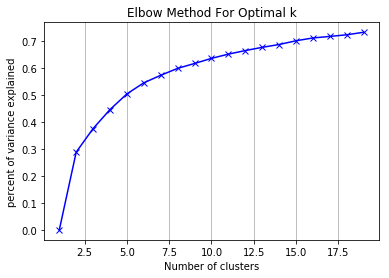

In [37]:


plt.plot(K, percent_of_explained, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('percent of variance explained')
plt.title('Elbow Method For Optimal k')
plt.grid(axis = 'x')
plt.show()

In [16]:
percent_of_explained[9]

0.636319274968889

In [17]:
percent_of_explained[17]

0.7256828837987456

In [18]:
 # set number of clusters
kclusters = 5

singapore_grouped_clustering = df00

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(singapore_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 2, 1, 1, 1, 3, 3, 1, 1, 1], dtype=int32)

In [19]:
df00['cluster_lable'] = kmeans.labels_

/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [20]:
df000 = pd.concat([df00,df01],axis = 1)

In [21]:
df000.head()

,year_completed,dis_MRT,prim_no,psf_sale,dis_fairprice,dis_pool,cluster_lable,blk_no,street,latitude,longitude
0,2009,199.468223,1.0,1005.1875,220.887653,2301.414936,0,1A,CANTONMENT RD,1.277830,103.840953
1,2014,628.886166,2.0,1075.0,426.195557,1145.402321,2,10A,BOON TIONG RD,1.286793,103.833135
2,1977,1031.568882,1.0,287.625,1048.577178,919.340838,1,36,MARSILING DR,1.442024,103.775188
3,1980,1031.568882,1.0,289.2,1048.577178,919.340838,1,201,MARSILING DR,1.442024,103.775188
4,1989,951.765621,5.0,290.25,1283.229845,879.546854,1,812,JURONG WEST ST 81,1.346300,103.695902


In [22]:
df000.to_csv('hdb_after_cluster_k5.csv',index = False)

In [44]:
import pandas as pd
df1 = pd.read_csv('hdb_after_cluster.csv')

In [47]:
df00 = df1[df1['cluster_lable'] == 0]

In [48]:
df00.head()

,Unnamed: 0,year_completed,dis_MRT,prim_no,psf_sale,dis_fairprice,dis_pool,cluster_lable,blk_no,street,latitude,longitude
37,37,1999,425.163043,4.0,312.500000,493.063440,1062.956795,0,667,CHOA CHU KANG CRES,1.399745,103.750766
44,44,1997,425.163043,4.0,314.166667,493.063440,1062.956795,0,669,CHOA CHU KANG CRES,1.399745,103.750766
46,46,2000,425.163043,4.0,314.350000,493.063440,1062.956795,0,683A,CHOA CHU KANG CRES,1.399745,103.750766
48,48,1983,243.840633,3.0,316.000000,348.205132,988.580705,0,1,TECK WHYE AVE,1.379293,103.756167
51,51,1978,301.526991,3.0,316.500000,290.952001,1036.977175,0,12,TECK WHYE LANE,1.379456,103.755675


In [24]:
df000 = df1.loc[0:1200]

In [59]:
import numpy as np

In [27]:
 # set number of clusters
kclusters = 5

In [28]:
# create map
map_clusters = folium.Map(location = [1.3521, 103.8198], tiles='Cartodb Positron', zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df000['latitude'], df000['longitude'], df000['blk_no'], df000['cluster_lable']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<h3>3.3 clustering -hierarchy class</h3>

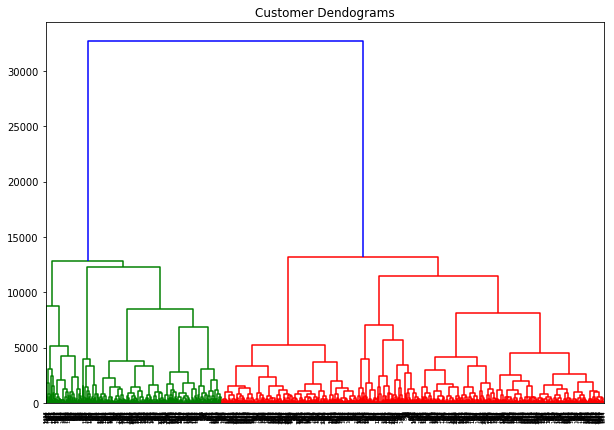

In [61]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Customer Dendograms")  
dend = shc.dendrogram(shc.linkage(df00, method='ward')) 

In [48]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=11, affinity='euclidean', linkage='ward')  
cluster.fit_predict(df00)  

array([10,  5,  0, ...,  8,  2,  5])

In [63]:
df00['cluster_lable'] = cluster.labels_

/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [46]:
# find the best k
from sklearn.preprocessing import MinMaxScaler

In [51]:
#To give equal importance to all features, we need to scale the continuous features.
mms = MinMaxScaler()
mms.fit(df00)
data_transformed = mms.transform(df00)

/home/jupyterlab/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [52]:
cluster = cluster.fit(data_transformed)

In [53]:
kk = cluster.inertia_

AttributeError: 'AgglomerativeClustering' object has no attribute 'inertia_'

In [ ]:
percent_of_explained = (Sum_of_squared_distances[0] - Sum_of_squared_distances)/Sum_of_squared_distances[0]

In [ ]:
#initialise k-means and use the inertia attribute to identify the sum of squared distances of samples to the nearest cluster centre.
Sum_of_squared_distances = []
K = range(1,20)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

In [65]:
df000 = pd.concat([df00,df01],axis = 1)

In [66]:
df000.to_csv('hdb_after_cluster_k11_hie.csv',index = False)

In [1]:
import pandas as pd
df1 = pd.read_csv('hdb_after_cluster_k11_hie.csv')

In [2]:
import numpy as np

In [4]:
 # set number of clusters
kclusters = 11

In [5]:
df000 = df1.loc[0:1200]

In [8]:
# create map
map_clusters = folium.Map(location = [1.3521, 103.8198], tiles='Cartodb Positron', zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df000['latitude'], df000['longitude'], df000['blk_no'], df000['cluster_lable']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<h2>4. Filter (results) </h2>

In [32]:
import pandas as pd
df = pd.read_csv('hdb_after_cluster_k11_hie.csv')
df0000 =pd.read_csv('hdb-property-information.csv')

In [33]:
df.head()

,year_completed,dis_MRT,prim_no,psf_sale,dis_fairprice,dis_pool,cluster_lable,blk_no,street,latitude,longitude
0,2009,199.468223,1.0,1005.1875,220.887653,2301.414936,10,1A,CANTONMENT RD,1.277830,103.840953
1,2014,628.886166,2.0,1075.0000,426.195557,1145.402321,5,10A,BOON TIONG RD,1.286793,103.833135
2,1977,1031.568882,1.0,287.6250,1048.577178,919.340838,0,36,MARSILING DR,1.442024,103.775188
3,1980,1031.568882,1.0,289.2000,1048.577178,919.340838,0,201,MARSILING DR,1.442024,103.775188
4,1989,951.765621,5.0,290.2500,1283.229845,879.546854,0,812,JURONG WEST ST 81,1.346300,103.695902


In [34]:
# filter example
df = df[(df['dis_MRT']<=350)&(df['prim_no']>=3)&(df['year_completed']>=2000)&(df['dis_fairprice']<500)]

In [35]:
df.head(1)

,year_completed,dis_MRT,prim_no,psf_sale,dis_fairprice,dis_pool,cluster_lable,blk_no,street,latitude,longitude
292,2000,194.583621,4.0,361.625,292.548722,3411.690167,9,351B,CANBERRA RD,1.450891,103.819987


In [36]:
print('There are ' + str(df.shape[0]) + ' block groups meet your need')

There are 75 block groups meet your need


In [37]:
# check out similar blocks within the same group
i = 292
df0000[(df0000['year_completed'] == df.loc[i,"year_completed"])&(df0000['street'] == df.loc[i,'street'])&(df0000['residential'] == 'Y')]

,blk_no,street,max_floor_lvl,year_completed,residential,commercial,market_hawker,miscellaneous,multistorey_carpark,precinct_pavilion,...,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental
5550,351B,CANBERRA RD,14,2000,Y,N,N,N,N,N,...,0,27,53,0,0,0,0,0,0,0
5552,351C,CANBERRA RD,14,2000,Y,N,N,N,N,N,...,0,26,52,0,0,0,0,0,0,0
5554,351D,CANBERRA RD,14,2000,Y,N,N,N,N,N,...,0,0,0,78,0,0,0,0,0,0
5567,352A,CANBERRA RD,14,2000,Y,N,N,N,N,N,...,0,27,53,0,0,0,0,0,0,0
5568,352B,CANBERRA RD,14,2000,Y,N,N,N,N,N,...,0,27,53,0,0,0,0,0,0,0
5569,352C,CANBERRA RD,14,2000,Y,N,N,N,N,N,...,0,26,65,0,0,0,0,0,0,0


<h2> The end (no python codes for other parts of report)</h2>

In [ ]:
<h2>5. Conclusion and expansion</h2>
